<div style="position: relative; width: 100%; height: 100vh; padding: 50px; box-sizing: border-box;">
    <!-- Logo positioned in the right corner -->
    <img src="logo.png" style="position: absolute; top: 10px; right: 10px; width: 100px;"/>

   <!-- Proprietary Content -->
   <div style="position: absolute; bottom: px5; left: 5%; transform: translateX(-50%); color: grey; text-align: left;font-style: italic">
   <p>Proprietary content. © 10xTechClub. All Rights Reserved. Unauthorized use or distribution prohibited.</p>
   </div>
</div>

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    <font color='purple'>Project Topic: Object Detection using OpenCV</font>
</div>



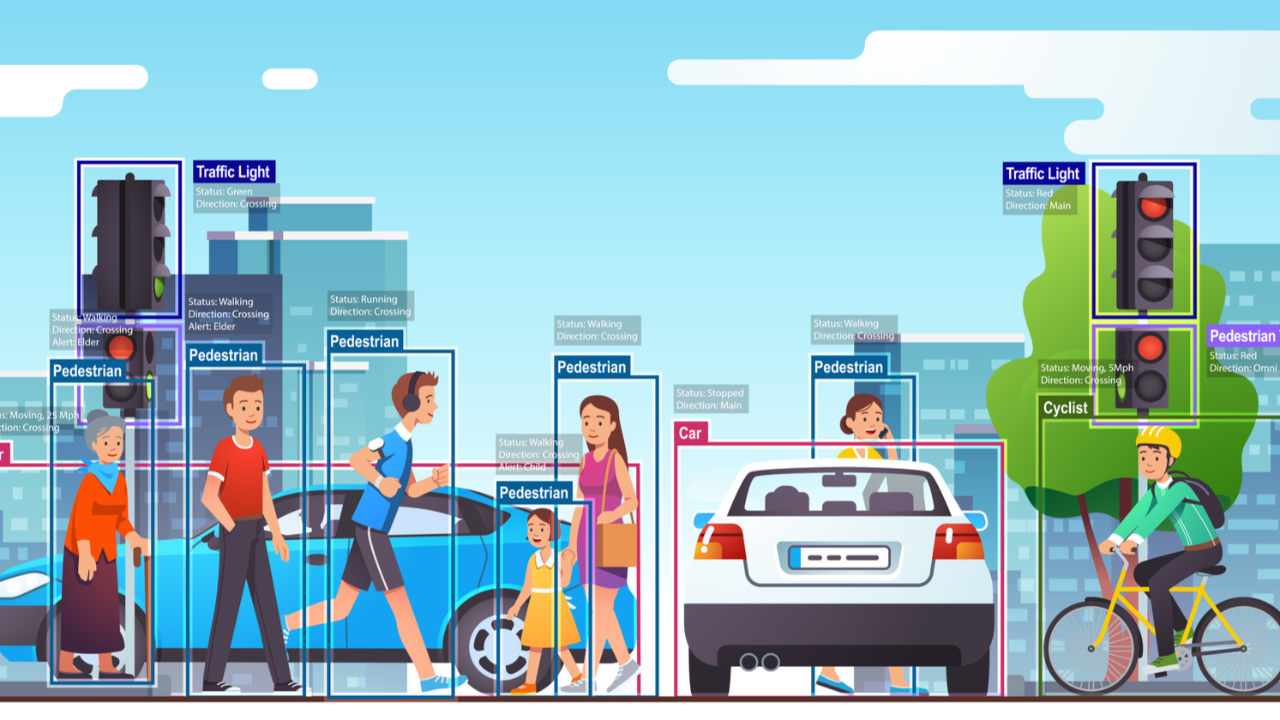

## What is Object Detection?

- **Definition:** Object detection is a computer vision technique that identifies and locates objects within an image or video. It not only recognizes the object but also draws a bounding box around it.
- **Purpose:** Helps in applications like face recognition, vehicle detection, and image tagging.

## What is OpenCV?

- **Definition:** OpenCV (Open Source Computer Vision Library) is a popular library used for computer vision and image processing tasks. It provides tools to perform various operations on images and videos.
- **Features:** Includes functions for object detection, image filtering, and feature extraction.


### **📝 Problem Statement**
Imagine a robot that can see and recognize objects! In this project, you’ll build an object detection system that identifies different objects using a camera.

### **🔧 What Are We Going to Use?**
- **OpenCV**: For image processing and object detection.
- **Pre-trained Models**: Models that have already been trained to recognize objects.
- **Python**: To write the code that performs object detection.

### **🌍 Real-World Applications**
- **Autonomous Vehicles**: Helps cars detect obstacles on the road.
- **Security Systems**: Identifies objects or people in surveillance footage.

### **🖥️ Key Code Concepts**
- **Image Processing**: Techniques used to analyze images for detecting objects.
- **Bounding Boxes**: Draw boxes around detected objects to highlight them.
- **Model Loading**: Use pre-trained models to simplify the detection process.


<font color='red'>**1. Import Necessary Libraries**</font>

First, we import the libraries that help us work with images and perform object detection. `cv2` is the OpenCV library, which is used for computer vision tasks. `matplotlib.pyplot` is used for displaying images in our notebook.


In [1]:
import cv2                          # pip install opencv-python
                                    # Import OpenCV for image and video processing.

In [2]:
import matplotlib.pyplot as plt     #pip install matplotlib
                                    # Import Matplotlib for displaying images.

<font color='red'>**2. Load Configuration and Model Files**</font>

Next, we load the configuration file (`.pbtxt`) and the pre-trained model (`.pb`) that will help us detect objects in images. These files tell the computer how to detect objects in an image.


In [3]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'  # Path to the configuration file for the model.
frozen_model='frozen_inference_graph.pb'   #  Path to the trained model (frozen graph).

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)       # Load the model using the specified config and weights.          

<font color='red'>**3. Load Class Labels**</font>

Here, we load the labels (names) of the objects that the model can detect from a text file (`labels.txt`). These labels help us identify what objects the model has detected in the image.


In [5]:
classLabels = []                                            # Initialize an empty list to store class labels.
file_name = 'labels.txt'                                    # Path to the file containing class labels.
with open(file_name, 'rt') as fpt:                          # Open the file in read mode.
    classLabels = fpt.read().rstrip('\n').split('\n')       # Read labels from file and split them into a list.
    

In [6]:
print(classLabels)                                           # Print the list of class labels.

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))                                      #  Print the number of class labels

80


<font color='red'>**4. Configure the Model Input Settings**</font>

We set the input size, scale, mean, and swap the color channels for the model. These settings are necessary to properly prepare the image for detection.


In [8]:
model.setInputSize(320,320)                                  # Set the size of the input image for the model.
model.setInputScale(1.0/127.5)                               # Set the scale factor for input normalization.
model.setInputMean((127.5,127.5,127.5))                      # Set the mean values for input normalization.
model.setInputSwapRB(True)                                   # Swap the R and B channels for the input image (BGR to RGB).

< cv2.dnn.Model 00000172A2E6D0D0>

## read an image

<font color='red'>**5. Load and Display the Image**</font>

Finally, we load an image from the file (`'Man-tuxedo-car_1366x768.jpg'`) and display it using `matplotlib`. We also convert the color from BGR to RGB for correct display.


In [9]:
img = cv2.imread('Man-tuxedo-car_1366x768.jpg')              # Read an image from the file.

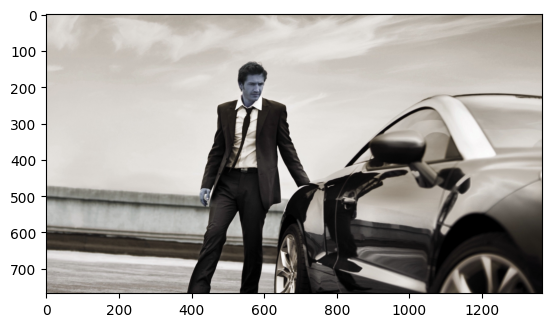

In [10]:
plt.imshow(img)                                              # Display the image (in BGR format).

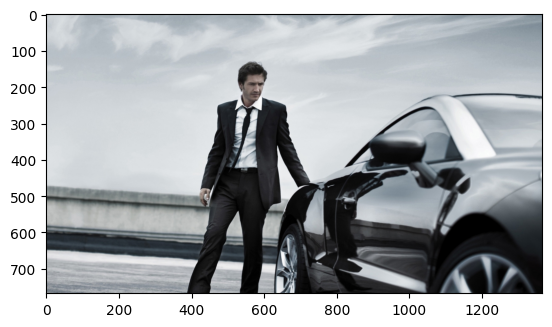

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))          # Convert BGR to RGB and display the image correctly.

<font color='red'>**6. Detect Objects in the Image**</font>

Now, we use the model to detect objects in the image we loaded earlier. The model returns the class index (what object it thinks it is), the confidence (how sure it is), and the bounding box (where the object is located in the image). We then draw rectangles around the detected objects and label them with the object names.


In [12]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold = 0.5)    
# Detect objects in the image with a confidence threshold of 0.5.


In [13]:
print(ClassIndex)                                                # Print the indices of detected classes.

[3 1]


In [14]:
font_scale = 3                                                # Set the font scale for text on the image.
font = cv2.FONT_HERSHEY_PLAIN                                 # Choose a simple font type.
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):  # Loop over detected objects.
    cv2.rectangle(img,boxes,(255,0,0), 2)                     # Draw a rectangle around detected objects.
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10 ,boxes[1]+40), font,fontScale=font_scale,color=(0,255,0), thickness=3) 
                                                              # Put the class label text near the rectangle.

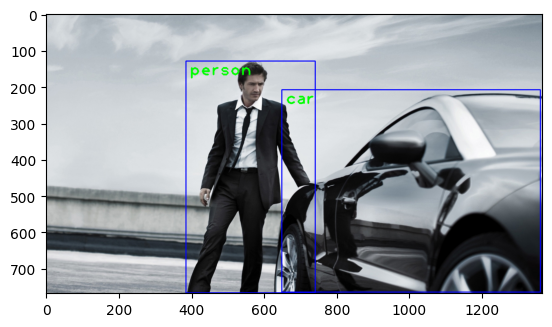

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))    # Convert the image back to RGB and display it.

## Video Demo

<font color='red'>**7. Open a Video File or Use Webcam**</font>

Here, we try to load a video file (`'Walking The Streets Of New York.mp4'`). If the video file cannot be opened, we try to use the computer's webcam instead. If neither works, an error is raised.


In [16]:
cap = cv2.VideoCapture('The Streets Of New York recording.mp4')

# checked if the video is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot capture video")
    
font_scale = 3                    # Set the font scale for text.
font = cv2.FONT_HERSHEY_PLAIN     # Choose a simple font type.

while True:                       # Start an infinite loop to process video frames.
    ret,frame = cap.read()        # Read a frame from the video
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold= 0.55)     
    # Detect objects in the frame with a higher confidence threshold (0.55)
    
    print(ClassIndex)             # Print the indices of detected classes.
    
    if (len(ClassIndex)!=0):      # If any objects are detected:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):  
        # Loop over detected objects.
            if (ClassInd<=80):     # Check if the detected class index is within the valid range (1-80).
                cv2.rectangle(frame,boxes,(255,0,0),2)     # Draw a rectangle around detected objects.
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10 ,boxes[1]+40), font,fontScale=font_scale,color=(0,255,0), thickness=3)    
                # Put the class label text near the rectangle.
                
    cv2.imshow('Object Detection Tutorial' , frame)   
    # Display the frame with detected objects.
    
    if cv2.waitKey(2) & 0xFF == ord('q'):             
        # Break the loop if 'q' is pressed.
        break
        
cap.release()                 # Break the loop if 'q' is pressed.
cv2.destroyAllWindows()       # Close all OpenCV windows.

[3 1 1 1 1 1 1 1]
[3 1 1 1 1 1 1]
[3 1 1 1 1 1 1 1 1]
[3 1 1 1 1 6 1 8 1]
[3 1 1 1 1 6 1 8 1]
[1 3 1 1 1 6 1 1]
[1 3 1 1 1 6 1 1 1 1]
[1 3 1 1 1 1 6 1 8]
[ 3  1  1  1  1 10  1  1  1  1  1  6]
[ 3  1  1  1  1  1 10  1  1  1]
[3 1 1 1 1 1 1 1 1]
[ 3  1  1  1  1 10  1  1  1 10  6  1  1]
[ 3  1  1  6  1  1  1  1  1 10  8  1  1 10]
[ 3  1  1  1 10  1  1  1  1 10  6 10]
[ 3  1  1  1  1  1 10  1  1 10  6]
[ 3  1  1  1  1  1  1 10  1 10]
[ 3  1  1  1  1  1  1  1 10  1]
[ 3  1  1  1  1  1  1 10  1  1  1 10]
[ 3  1  1  1  1  1  1 10  1  1]
[ 3  1  1  1  1  1  1  1  1  1 10]
[3 1 1 1 1 1 1 1 1 1 1]
[3 1 1 1 1 1 1 6 1 1 1 8]
[3 1 1 1 1 1 1 1 1 1 1 6]
[ 3  1  1  1  1  1  1  1  1 10  1  6  1 10]
[3 1 1 6 1 1 1 1 1 1 1 1 1 1]
[ 3  1  1  1  1  1  1 31  1  1  1 33  1]
[ 1  3  1  1  6  1  1  1  1  1  1 31  1]
[1 3 1 1 6 1 1 1 1 1 1 1 1 1]
[1 3 1 1 1 1 6 1 1 1 1 1 1 1]
[1 3 1 1 1 6 1 1 1 1 1 1 1]
[1 3 1 6 1 1 1 6 1 1 1 1]
[1 3 1 1 6 1 1 1 1 1 1 1 1 6]
[1 1 6 3 1 1 1 1 1 1 1 1]
[3 1 1 6 1 1 1 1 1 1 1]
[ 1

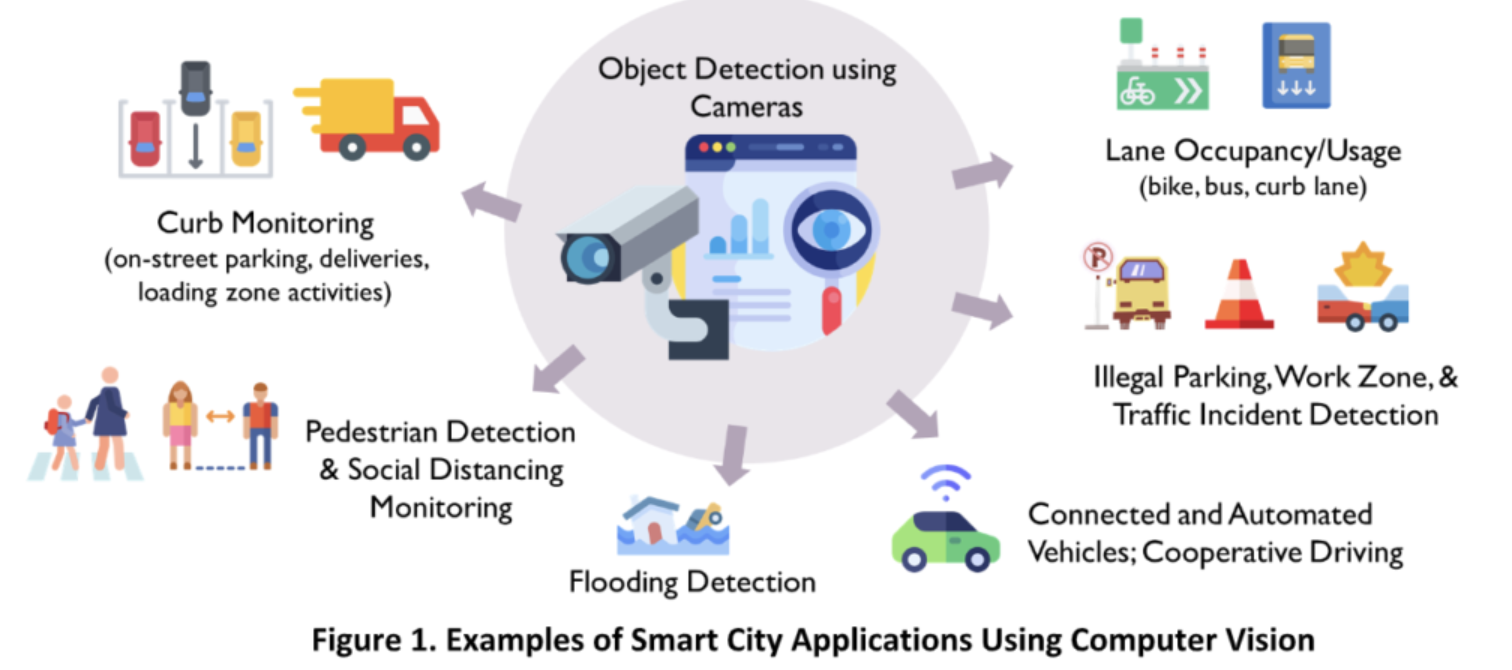

<font color='red'>**8. Detect Objects in Video Frames**</font>

Now, we continuously read frames from the video or webcam. For each frame, we use the model to detect objects, draw rectangles around them, and label them with the object names. The process keeps going until the 'q' key is pressed to stop the video.


In [17]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcame")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold= 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10 ,boxes[1]+40), font,fontScale=font_scale,color=(0,255,0), thickness=3)
                
    cv2.imshow('Object Detection Tutorial' , frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


# **Object Detection Code Overview**

## **Initialization:**

- **cap = cv2.VideoCapture(1):** Initializes video capture from the webcam (device 1).
  
- **if not cap.isOpened():** Checks if the webcam is opened. If not, attempts to open device 0.
  
- **if not cap.isOpened():** Raises an error if the webcam cannot be opened.

## **Font Settings:**

- **font_scale = 3:** Sets the scale for the font used in text overlays.
  
- **font = cv2.FONT_HERSHEY_PLAIN:** Specifies the font style for text overlays.

## **Main Loop:**

- **while True:** Continuously captures frames from the webcam.

  - **ret, frame = cap.read():** Reads a frame from the webcam.
  
  - **ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55):** Performs object detection on the frame with a confidence threshold of 0.55.
  
  - **print(ClassIndex):** Prints the detected class indices.

  - **if (len(ClassIndex) != 0):** Checks if any objects were detected.

  - **for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):** Iterates over detected objects.
    
  - **if (ClassInd <= 80):** Checks if the detected class index is valid.
      
  - **cv2.rectangle(frame, boxes, (255, 0, 0), 2):** Draws a blue rectangle around the detected object.
        
  - **cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3):** Adds a label for the detected object.

  - **cv2.imshow('Object Detection Tutorial', frame):** Displays the frame with detections in a window.
  
  - **if cv2.waitKey(2) & 0xFF == ord('q'):** Breaks the loop if 'q' is pressed.

## **Cleanup:**

- **cap.release():** Releases the webcam resource.

- **cv2.destroyAllWindows():** Closes all OpenCV windows.
